In [ ]:
from pyspecter.SPECTER import SPECTER
import numpy as np
from rikabplotlib.plot_utils import plot_event, newplot

ModuleNotFoundError: No module named 'src'

In [10]:
specter = SPECTER()


Compiling SPECTER model...
Generating test events for tracing ...
Test events generated! Time taken:  2.476168394088745  seconds.
Compiling spectral representation functions ...


KeyboardInterrupt: 

(94, 3)
[[ 1.64266692e-01 -5.02183728e-01  3.23356501e-01]
 [ 9.89204832e-02 -1.73907662e+00  9.58934782e-02]
 [ 8.81171757e-02 -5.24147529e-01  3.33037133e-01]
 [ 6.98071881e-02  4.01883950e-01 -1.15955812e-01]
 [ 6.11382148e-02 -2.94012265e+00 -5.83690010e-02]
 [ 5.29346906e-02 -5.49539035e-01  4.53675708e-01]
 [ 4.07752252e-02 -2.80011003e+00  1.66117606e-01]
 [ 3.20932630e-02 -1.49257269e+00  1.51831273e-01]
 [ 3.12212666e-02 -1.60453507e+00 -3.26762131e-01]
 [ 2.89616433e-02 -1.84197638e+00  1.07539222e-01]
 [ 2.72405994e-02 -6.69347283e-01  2.33194950e-01]
 [ 2.71230867e-02 -2.39573332e+00 -7.05133513e-01]
 [ 2.55582343e-02 -6.47530244e-01 -3.22573156e-01]
 [ 2.40754346e-02 -9.06872094e-01 -2.47615118e-01]
 [ 2.10934472e-02 -4.59284261e-01  8.96105177e-02]
 [ 1.84293405e-02 -8.28733101e-01 -5.20606192e-01]
 [ 1.73483024e-02 -2.41897091e+00 -1.55729466e+00]
 [ 1.73186579e-02 -1.66296153e+00  6.54744796e-01]
 [ 1.46914705e-02  1.13179821e+00 -4.42658676e-01]
 [ 1.42941295e-02 -6.14

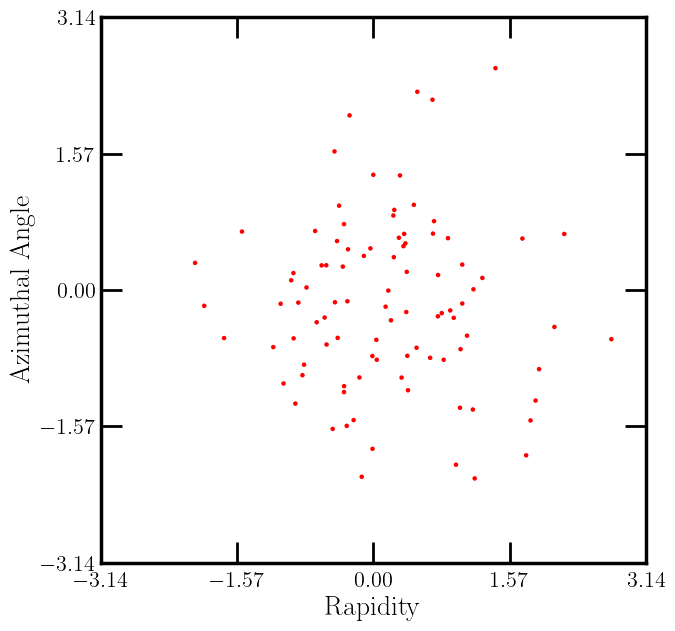

(94, 3)
0.9999999999999998
0.9999999999999999


In [ ]:
# Load csv file
event = np.loadtxt("test_event.csv", delimiter=",", skiprows=1)
print(event.shape)

# Sort by the first column in descending order
event = event[event[:, 0].argsort()[::-1]]
print(event)

# event[0] = [0.5, 1, 0]
# event[1] = [0.5, -1, 0]
# event[2:] = [0, 0, 0]

event = event[:,:]


event = np.random.normal(size=(94, 3))
event[:,0] = 1/94

fig, ax = newplot("full")
plot_event(ax, event, 3.14)


# 0-pad the event to make it 128 long
# event = np.pad(event, ((0, 94 - event.shape[0]), (0, 0)), mode='constant', constant_values=0)
print(event.shape)

# Reshape to (1, 94, 3)
event = event.reshape(1, -1, 3)


print(np.sum(event[0,:,0]))

# Divide by the sum of the first column
event = event / np.sum(event[0,:,0])
print(np.sum(event[0,:,0]))

# Sort by the first column




In [4]:
emd = specter.spectralEMD(event, event)
print(emd)

[0.00074053]


In [5]:
from pyspecter.SpectralEMD_Helper import compute_spectral_representation
import matplotlib.pyplot as plt


spectral_representation = compute_spectral_representation(event[0])
print(spectral_representation)

for row in spectral_representation:
    print(row)

[[0.0000000e+00 1.0638298e-02]
 [3.8863294e-02 2.2634676e-04]
 [5.3898703e-02 2.2634676e-04]
 ...
 [4.7295065e+00 2.2634676e-04]
 [4.8727179e+00 2.2634676e-04]
 [4.9501829e+00 2.2634676e-04]]
[0.        0.0106383]
[0.03886329 0.00022635]
[0.0538987  0.00022635]
[0.05691922 0.00022635]
[0.06558634 0.00022635]
[0.06613591 0.00022635]
[0.06882774 0.00022635]
[0.07529144 0.00022635]
[0.08670839 0.00022635]
[0.09397525 0.00022635]
[0.09893776 0.00022635]
[0.10297071 0.00022635]
[0.10314689 0.00022635]
[0.10636347 0.00022635]
[0.10988291 0.00022635]
[0.11012614 0.00022635]
[0.11516321 0.00022635]
[0.12247813 0.00022635]
[0.14112745 0.00022635]
[0.14119558 0.00022635]
[0.14358805 0.00022635]
[0.14361997 0.00022635]
[0.14827237 0.00022635]
[0.14938799 0.00022635]
[0.14978188 0.00022635]
[0.15713564 0.00022635]
[0.15726136 0.00022635]
[0.1579734  0.00022635]
[0.16001555 0.00022635]
[0.16330563 0.00022635]
[0.16553533 0.00022635]
[0.16625339 0.00022635]
[0.16857675 0.00022635]
[0.16879524 0.0002

In [6]:
import jax
import jax.numpy as jnp
from jax import grad, jacobian, jit
from jax.lax import dynamic_slice


from jax.example_libraries import optimizers as jax_opt
import numpy as np




def euclidean_metric(points):
    return jnp.sum(jnp.square(points[:, None, :] - points[None, :, :]), axis=-1)



def euclidean_metric_cross(points1, points2):
    return jnp.sum(jnp.square(points1[:, None, :] - points2[None, :, :]), axis=-1)


def cylindrical_metric(points):

    PHI_INDEX = 1
    


def spherical_metric(points):

    # Square so the beta = 1 default works
    #
    return jnp.nan_to_num(jnp.square(1 - (jnp.sum(points[:, None, :] * points[None, :, :], axis=-1) / jnp.linalg.norm(points[:, None, :], axis=-1) / jnp.linalg.norm(points[None, :], axis=-1))))



    return jnp.nan_to_num(jnp.square(jnp.arccos(jnp.sum(points[:, None, :] * points[None, :, :], axis=-1) / jnp.linalg.norm(points[:, None, :], axis=-1) / jnp.linalg.norm(points[None, :], axis=-1))))
    return jnp.sqrt(1 - jnp.sum(points[:, None, :] * points[None, :, :], axis=-1) / (jnp.linalg.norm(points[:, None, :], axis=-1) * jnp.linalg.norm(points[None, :, :], axis=-1)))


def spherical_metric_cross(points1, points2):
    
    return jnp.nan_to_num(jnp.square(1 - (jnp.sum(points1[:, None, :] * points2[None, :, :], axis=-1) / jnp.linalg.norm(points1[:, None, :], axis=-1) / jnp.linalg.norm(points2[None, :], axis=-1))))
    return jnp.nan_to_num(jnp.square(jnp.arccos(jnp.sum(points1[:, None, :] * points2[None, :, :], axis=-1) / jnp.linalg.norm(points1[:, None, :], axis=-1) / jnp.linalg.norm(points2[None, :], axis=-1))))
    return jnp.sqrt(1 - jnp.sum(points1[:, None, :] * points2[None, :, :], axis=-1) / (jnp.linalg.norm(points1[:, None, :], axis=-1) * jnp.linalg.norm(points2[None, :, :], axis=-1)))


# ########## Spectral Representation ##########
def compute_spectral_representation(events, omega_max = 2, beta = 1.0, dtype = jnp.float32, euclidean = True):
        """Function to compute the spectral representation of a set of events. Must be compiled before use on batched events -- see SPECTER.compile().
euclidean_distance_squared
        Args:
            events (ndarray): Array of events with shape (batch_size, pad, 3)
            omega_max (float, optional): Maximum omega value. Defaults to 2.
            beta (float, optional): Beta value for the spectral representation. Defaults to 1.
            dtype (jax.numpy.dtype, optional): Data type for the output. Defaults to jax.numpy.float32.

        Returns:
            ndarray: Spectral representation of the events with shape (batch_size, pad*(pad-1)/2, 2)
        """

        # Events shape is (pad, 3)
        points, zs = events[:,1:], events[:,0]


        euclidean_distance_squared = jax.lax.cond(euclidean, euclidean_metric, spherical_metric, points)
        

        # Upper Triangle Matrices
        omega_ij = jnp.triu((euclidean_distance_squared), k = 1)
        triangle_indices = jnp.triu_indices(zs.shape[0], k = 1)
        triangle_indices_i = triangle_indices[0]
        triangle_indices_j = triangle_indices[1]

        # Get pairwise products of energies
        ee_ij = jnp.triu(zs[:,None] * zs[None,:])
        ee2 = jnp.trace(ee_ij, axis1 = 0, axis2=1)

        # Flatten to 1D Spectral Representation and remove 0s
        omega_n = omega_ij[triangle_indices_i, triangle_indices_j]
        omega_n = jnp.power(omega_n, beta / 2) / beta
        ee_n = 2 * ee_ij[triangle_indices_i, triangle_indices_j]

        s = jnp.stack((omega_n, ee_n), axis = 1)
        s = jnp.transpose(s, (0,1))
        
        # Sort and append 0
        indices = s[:,0].argsort()
        s = s[indices]
        s0 = jnp.zeros((1, 1))
        s1 = jnp.concatenate((s0, ee2 * jnp.ones((1,1))), axis = 1)
        s = jnp.concatenate((s1, s), axis = 0)

        

        return s.astype(dtype)



def compute_double_spectral_representation(event1, event2, omega_max = 2, beta = 1.0, dtype = jnp.float32, euclidean = True):

    s1 = compute_spectral_representation(event1, omega_max, beta, dtype, euclidean)
    s2 = compute_spectral_representation(event2, omega_max, beta, dtype, euclidean)


    # concatenate the two spectral representations, sort by omega
    s = jnp.concatenate((s1, s2), axis = 0)
    indices = s[:,0].argsort()
    s = s[indices]

    return s



def compute_cross_spectral_representation(event1, event2, omega_max = 2, beta = 1.0, dtype = jnp.float32, euclidean = True):

    points1, zs1 = event1[:,1:], event1[:,0]
    points2, zs2 = event2[:,1:], event2[:,0]

    euclidean_distance_squared = jax.lax.cond(euclidean, euclidean_metric_cross, spherical_metric_cross, points1, points2)
    e_ij = 2 * zs1[:,None] * zs2[None,:]


    omega_n = euclidean_distance_squared.flatten()
    omega_n = jnp.power(omega_n, beta / 2) / beta
    ee_n = e_ij.flatten()

    s = jnp.stack((omega_n, ee_n), axis = 1)
    s = jnp.transpose(s, (0,1))

    # Sort
    indices = s[:,0].argsort()
    s = s[indices]

    return s.astype(dtype)

    


# #############################################
# ########## Spectral EMD Calculator ##########
# #############################################

def weighted_sum(s, p = 2, max_index = None, inclusive = True):
    
    if max_index is None:
        return jnp.sum(s[:,1] * jnp.power(s[:,0], p), axis = -1)
    else:
        max_index = max_index + 1 if inclusive else max_index
        return jnp.sum(s[:max_index,1] * jnp.power(s[:max_index,0], p),axis = -1)


def find_indices_jax(X, Y):

    pairs = jnp.zeros((X.shape[0] + Y.shape[0], 2), dtype=int)

    j_indices = jnp.searchsorted(Y, X, side = 'left')
    i_indices = jnp.searchsorted(X, Y, side = 'left')

    # Update the 'pairs' array using the new 'at' method
    pairs = pairs.at[0:X.shape[0], 0].set(jnp.arange(X.shape[0]))
    pairs = pairs.at[0:X.shape[0], 1].set(j_indices)
    pairs = pairs.at[X.shape[0]:X.shape[0] + Y.shape[0], 0].set(i_indices)
    pairs = pairs.at[X.shape[0]:X.shape[0] + Y.shape[0], 1].set(jnp.arange(Y.shape[0]))

    return pairs


# Function to find indices on X and Y, then Y and X, and combine:
def find_indices(X, Y):
        
        x_size = X.shape[0]
        y_size = Y.shape[0]
    
        # Find indices on X and Y
        indices = find_indices_jax(X, Y)

        # Remove duplicates
        indices = jnp.unique(indices, size = (x_size + y_size), fill_value = -1, axis = 0)
        mask = (indices[:,0] >= 0) * (indices[:,1] >= 0) * (indices[:,0] < X.shape[0]) * (indices[:,1] < Y.shape[0])

        return indices, mask


# Compute the cross term using the OLD parralized algorithm [DEPRECATED]
def cross_term(s1, s2):

    # Cross term
    omega1s = s1[:,0]
    omega2s = s2[:,0]

    E1s = s1[:,1]
    E2s = s2[:,1]


    E1_cumsums = jnp.cumsum(E1s, axis = -1)
    E2_cumsums = jnp.cumsum(E2s, axis = -1)
    shifted_E1_cumsums = jnp.concatenate((jnp.array((E1_cumsums[0],)), E1_cumsums[:-1]), axis = -1) 
    shifted_E2_cumsums = jnp.concatenate((jnp.array((E2_cumsums[0],)), E2_cumsums[:-1]), axis = -1) 

    
    
    omega_n_omega_l = omega1s[:,None] * omega2s[None,:]
    minE = jnp.minimum(E1_cumsums[:,None], E2_cumsums[None,:])
    maxE = jnp.maximum(shifted_E1_cumsums[:,None], shifted_E2_cumsums[None,:])
    x = minE - maxE

    cross = omega_n_omega_l * x * theta(x)
    cross_term = jnp.sum(cross, axis = (-1,-2))


    return cross_term


# Calculate the cross term using the improved JAX finding finding algorithm ~ O(n^2)
def cross_term_improved(s1, s2):

    # Cross term
    omega1s = s1[:,0]
    omega2s = s2[:,0]

    E1s = s1[:,1]
    E2s = s2[:,1]

    # Calculate cumulative spectral functions
    cumulative_inclusive_1 = jnp.cumsum(E1s, axis = -1)
    cumulative_inclusive_2 = jnp.cumsum(E2s, axis = -1)

    Etot1 = jnp.sum(E1s)
    Etot2 = jnp.sum(E2s)

    # Exclusive = inclusive - 2EE
    cumulative_exclusive_1 = jnp.concatenate((cumulative_inclusive_1[:1],
                                          cumulative_inclusive_1[:-1]))
    cumulative_exclusive_2 = jnp.concatenate((cumulative_inclusive_2[:1],
                                          cumulative_inclusive_2[:-1]))

    # Determine which indices survive the theta function O(n^2)
    indices, mask = find_indices(cumulative_inclusive_1, cumulative_inclusive_2)
    # indices = jax.lax.stop_gradient(indices)
    # mask = jax.lax.stop_gradient(mask)
    i_indices, j_indices = indices[:,0], indices[:,1]

    
    # O(n2) parts -- calculate the cross term using the nonzero indices
    omega_n_omega_l = omega1s[i_indices] * omega2s[j_indices]
    minE = -jnp.maximum(Etot1 - cumulative_inclusive_1[i_indices], Etot2 - cumulative_inclusive_2[j_indices]) + jnp.minimum(Etot1 - cumulative_exclusive_1[i_indices], Etot2 -  cumulative_exclusive_2[j_indices])
    cross = omega_n_omega_l * minE

    # Get a mask of the places where omega_n_omega_l is nonzero
    nonzero = omega_n_omega_l >= 0
    nonzero_cross = jnp.where(nonzero, cross, 0)
    nonzero_mask = jnp.where(mask, nonzero, 0)

    cross_term = jnp.sum(nonzero_cross * nonzero_mask, axis = (-1))


    return cross_term


def theta(x):

    return jnp.heaviside(x, 0.0) 

def ds2(s1, s2):

    term1 = weighted_sum(s1)
    term2 = weighted_sum(s2)

    return term1 + term2 - 2*cross_term_improved(s1, s2)


In [7]:
term1 = weighted_sum(spectral_representation)
term2 = weighted_sum(spectral_representation)

print(term1)
print(term2)
print(cross_term(spectral_representation, spectral_representation))
print(cross_term_improved(spectral_representation, spectral_representation))
print(ds2(spectral_representation, spectral_representation))

3.5827677
3.5827677
3.5827668
3.582767
1.4305115e-06


[[0. 2.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 1.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [2. 1.]]
4.0


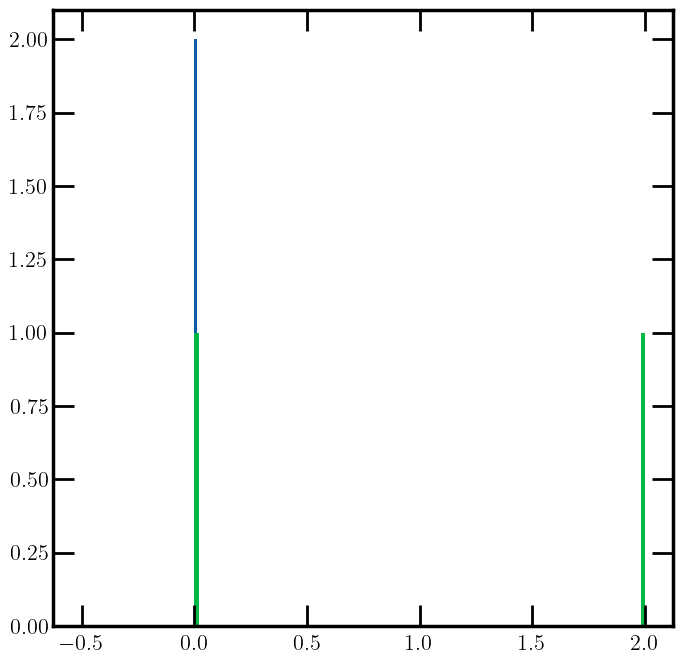

In [8]:
event1 = np.zeros_like(event[0])
event1[0] = [np.sqrt(2), 0, 0]

event2 = np.zeros_like(event[0])
event2[0] = [0.5 * np.sqrt(2), 1, 0]
event2[1] = [0.5 * np.sqrt(2), -1, 0]


s1 = compute_spectral_representation(event1)
s2 = compute_spectral_representation(event2)

print(s1)
print(s2)

plt.hist(s1[:,0], weights=s1[:,1], bins=100)
plt.hist(s2[:,0], weights=s2[:,1], bins=100)

print(ds2(s1, s2))